# Plot results

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools as itt
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path
import numpy as np
import scipy.stats as sps
from matplotlib import rc

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

---
## Create plots for local distances - Fig. S2 and S10

In [74]:
local_distances_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/local_distances.csv')
local_distances_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(local_distances_2.shape[0])]
local_distances_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/local_distances.csv')
local_distances_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(local_distances_3.shape[0])]
local_distances_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/local_distances.csv')
local_distances_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(local_distances_4.shape[0])]
local_distances_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/local_distances.csv')
local_distances_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(local_distances_5.shape[0])]
local_distances_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/local_distances.csv')
local_distances_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(local_distances_6.shape[0])]
local_distances_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/local_distances.csv')
local_distances_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(local_distances_7.shape[0])]

local_distances_2u = pd.read_csv('../results/disease_gene_vs_disease_variant_UMLS/local_distances.csv')
local_distances_2u['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(local_distances_2u.shape[0])]
local_distances_3u = pd.read_csv('../results/disease_gene_vs_disease_symptom_UMLS/local_distances.csv')
local_distances_3u['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(local_distances_3u.shape[0])]
local_distances_4u = pd.read_csv('../results/disease_gene_vs_disease_drug_UMLS/local_distances.csv')
local_distances_4u['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(local_distances_4u.shape[0])]
local_distances_5u = pd.read_csv('../results/disease_drug_vs_disease_variant_UMLS/local_distances.csv')
local_distances_5u['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(local_distances_5u.shape[0])]
local_distances_6u = pd.read_csv('../results/disease_symptom_vs_disease_variant_UMLS/local_distances.csv')
local_distances_6u['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(local_distances_6u.shape[0])]
local_distances_7u = pd.read_csv('../results/disease_drug_vs_disease_symptom_UMLS/local_distances.csv')
local_distances_7u['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(local_distances_7u.shape[0])]

local_distances_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/local_distances.csv')
local_distances_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(local_distances_22.shape[0])]
local_distances_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/local_distances.csv')
local_distances_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(local_distances_33.shape[0])]
local_distances_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/local_distances.csv')
local_distances_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(local_distances_44.shape[0])]
local_distances_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/local_distances.csv')
local_distances_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(local_distances_55.shape[0])]
local_distances_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/local_distances.csv')
local_distances_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(local_distances_66.shape[0])]
local_distances_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/local_distances.csv')
local_distances_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(local_distances_77.shape[0])]

local_distances_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(local_distances_1.shape[0])]
local_distances_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(local_distances_10.shape[0])]
local_distances_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(local_distances_11.shape[0])]
local_distances_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(local_distances_12.shape[0])]
local_distances_8 = pd.read_csv('../results/drug_disease_vs_drug_target/local_distances.csv')
local_distances_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(local_distances_8.shape[0])]

for ld in [local_distances_2, local_distances_2u, local_distances_22, local_distances_3, local_distances_3u, local_distances_33, 
           local_distances_4, local_distances_4u, local_distances_44, local_distances_5, local_distances_5u, local_distances_55, 
           local_distances_6, local_distances_6u, local_distances_66, local_distances_7, local_distances_7u, local_distances_77, 
           local_distances_8, local_distances_1, local_distances_10, local_distances_11, local_distances_12]:
    indices_remove = ld[ld['distance_type'] == "normalized_scores"].index # comment to plot Fig. S10. uncomment to plot Fig. S2
#     indices_remove = ld[ld['distance_type'] == "normalized_ranks"].index # uncomment to plot Fig. S10. comment to plot Fig. S2
    ld.drop(indices_remove, inplace=True)
    indices_remove = ld[ld['distance_type'] == "topology_only"].index
    ld.drop(indices_remove, inplace=True)

# concatenate both namespaces in one dataframe
ld_concatenated2 = pd.concat([local_distances_2.assign(space='MONDO'), local_distances_2u.assign(space='UMLS'), local_distances_22.assign(space='ICD-10')], ignore_index=True)
ld_concatenated3 = pd.concat([local_distances_3.assign(space='MONDO'), local_distances_3u.assign(space='UMLS'), local_distances_33.assign(space='ICD-10')], ignore_index=True)
ld_concatenated4 = pd.concat([local_distances_4.assign(space='MONDO'), local_distances_4u.assign(space='UMLS'), local_distances_44.assign(space='ICD-10')], ignore_index=True)
ld_concatenated5 = pd.concat([local_distances_5.assign(space='MONDO'), local_distances_5u.assign(space='UMLS'), local_distances_55.assign(space='ICD-10')], ignore_index=True)
ld_concatenated6 = pd.concat([local_distances_6.assign(space='MONDO'), local_distances_6u.assign(space='UMLS'), local_distances_66.assign(space='ICD-10')], ignore_index=True)
ld_concatenated7 = pd.concat([local_distances_7.assign(space='MONDO'), local_distances_7u.assign(space='UMLS'), local_distances_77.assign(space='ICD-10')], ignore_index=True)
ld_concatenated1 = local_distances_1.assign(space='ICD-10')
ld_concatenated10 = local_distances_10.assign(space='ICD-10')
ld_concatenated11 = local_distances_11.assign(space='ICD-10')
ld_concatenated12 = local_distances_12.assign(space='ICD-10')
ld_concatenated8 = local_distances_8.assign(space='MONDO')
local_distances = pd.concat([ld_concatenated2, ld_concatenated3, ld_concatenated4, ld_concatenated5, ld_concatenated6, ld_concatenated7, 
                            ld_concatenated1, ld_concatenated10, ld_concatenated11, ld_concatenated12, ld_concatenated8], ignore_index=True)    

In [75]:
local_distances.rename(columns={'distance': 'Local distance', 'permuted': 'Permuted'}, inplace=True)
dis_type = 'normalized_ranks' # comment to plot Fig. S10. uncomment to plot Fig. S2
# dis_type = 'normalized_scores' # uncomment to plot Fig. S10. comment to plot Fig. S2

In [76]:
maxima = []
lds = [[local_distances_2, local_distances_2u, local_distances_22], [local_distances_3, local_distances_3u, local_distances_33], 
       [local_distances_4, local_distances_4u, local_distances_44], [local_distances_5, local_distances_5u, local_distances_55], 
       [local_distances_6, local_distances_6u, local_distances_66], [local_distances_7, local_distances_7u, local_distances_77]]
for ld in lds:
    ld_mondo = ld[0]
    ld_umls = ld[1]
    ld_icd = ld[2]
    dftopo_m = ld_mondo[ld_mondo['distance_type'].str.contains(dis_type)]
    dftopo_umls = ld_umls[ld_umls['distance_type'].str.contains(dis_type)]
    dftopo_icd = ld_icd[ld_icd['distance_type'].str.contains(dis_type)]
    maxima.append([dftopo_m['distance'].max(), dftopo_umls['distance'].max(), dftopo_icd['distance'].max()])
lds = [local_distances_1, local_distances_10, local_distances_11, local_distances_12]
for ld in lds:
    dftopo_icd = ld[ld['distance_type'].str.contains(dis_type)]
    maxima.append([0.0, 0.0, dftopo_icd['distance'].max()])
dftopo_m = local_distances_8[local_distances_8['distance_type'].str.contains(dis_type)]
maxima.append([dftopo_m['distance'].max()])
# print(maxima)

In [77]:
def p_value_to_level(p_value):
    if p_value > 0.05:
        return 'ns'
    elif p_value > 0.01:
        return '*'
    elif p_value > 0.001:
        return '**'
    elif p_value > 0.0001:
        return '***'
    else:
        return '****'
    
def add_p_values(fig, p_value_strings, maxima):
    for axis_index, axis in enumerate(fig.axes.flatten()):
        bottom, top = axis.get_ylim()
        axis.set_ylim(top=top + (top - bottom) * .1)
        for x_pos, text in enumerate(p_value_strings[axis_index]):
            axis.text(x_pos, maxima[axis_index][x_pos] + (top - bottom) * .05, text, ha='center', va='bottom', fontsize=12)

In [78]:
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_mwu_p_values.csv')
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_mwu_p_values.csv')
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_mwu_p_values.csv')
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_mwu_p_values.csv')
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_mwu_p_values.csv')
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_mwu_p_values.csv')

p_values_2u = pd.read_csv('../results/disease_gene_vs_disease_variant_UMLS/global_mwu_p_values.csv')
p_values_3u = pd.read_csv('../results/disease_gene_vs_disease_symptom_UMLS/global_mwu_p_values.csv')
p_values_4u = pd.read_csv('../results/disease_gene_vs_disease_drug_UMLS/global_mwu_p_values.csv')
p_values_5u = pd.read_csv('../results/disease_drug_vs_disease_variant_UMLS/global_mwu_p_values.csv')
p_values_6u = pd.read_csv('../results/disease_symptom_vs_disease_variant_UMLS/global_mwu_p_values.csv')
p_values_7u = pd.read_csv('../results/disease_drug_vs_disease_symptom_UMLS/global_mwu_p_values.csv')

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_mwu_p_values.csv')
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_mwu_p_values.csv')
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_mwu_p_values.csv')

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_mwu_p_values.csv')

for pvd in [p_values_2, p_values_2u, p_values_22, p_values_3, p_values_3u, p_values_33, p_values_4, p_values_4u, 
            p_values_44, p_values_5, p_values_5u, p_values_55, p_values_6, p_values_6u, p_values_66, p_values_7, 
            p_values_7u, p_values_77, p_values_8, p_values_1, p_values_10, p_values_11, p_values_12]:
    indices_remove = pvd[pvd['distance_type'] == "normalized_scores"].index # comment to plot Fig. S10. uncomment to plot Fig. S2
#     indices_remove = pvd[pvd['distance_type'] == "normalized_ranks"].index # uncomment to plot Fig. S10. comment to plot Fig. S2
    pvd.drop(indices_remove, inplace=True)
    indices_remove = pvd[pvd['distance_type'] == "topology_only"].index
    pvd.drop(indices_remove, inplace=True)
    
pval_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_2u.assign(space='UMLS'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pval_concatenated2.set_index('space', inplace=True)
pval_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_3u.assign(space='UMLS'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pval_concatenated3.set_index('space', inplace=True)
pval_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_4u.assign(space='UMLS'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pval_concatenated4.set_index('space', inplace=True)
pval_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_5u.assign(space='UMLS'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pval_concatenated5.set_index('space', inplace=True)
pval_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_6u.assign(space='UMLS'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pval_concatenated6.set_index('space', inplace=True)
pval_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_7u.assign(space='UMLS'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pval_concatenated7.set_index('space', inplace=True)
pval_concatenated1 = p_values_1.assign(space='ICD-10')
pval_concatenated1.set_index('space', inplace=True)
pval_concatenated10 = p_values_10.assign(space='ICD-10')
pval_concatenated10.set_index('space', inplace=True)
pval_concatenated11 = p_values_11.assign(space='ICD-10')
pval_concatenated11.set_index('space', inplace=True)
pval_concatenated12 = p_values_12.assign(space='ICD-10')
pval_concatenated12.set_index('space', inplace=True)
pval_concatenated8 = p_values_8.assign(space='MONDO')
pval_concatenated8.set_index('space', inplace=True)

p_val_list = [pval_concatenated2, pval_concatenated3, pval_concatenated4, pval_concatenated5, pval_concatenated6, pval_concatenated7]
p_values = [[pv.loc['MONDO', 'p_value'], pv.loc['UMLS', 'p_value'], pv.loc['ICD-10', 'p_value']] for pv in p_val_list]
p_values.append([pval_concatenated1.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated10.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated11.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated12.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated8.loc['MONDO', 'p_value']])

p_value_strings = [[f'{p_value_to_level(p_value)} ({"{:.2e}".format(p_value)})' for p_value in vals] for vals in p_values]
for i in range(6,10):
    p_value_strings[i] = ['', '', p_value_strings[i][0]]
p_value_strings[10] = ([p_value_strings[10][0]])
# print(p_value_strings)

In [79]:
def adjust_titles(fig, width=80):
    subfig = 'a'
    for axis in fig.axes.flatten():
        title = axis.get_title().split(' = ')[1]
        axis.set_title('')
        title = r"$\bf{" + subfig + "}$  " + title
        if len(title) > 2*width/3:
            words = title.split(' ')
            title=''
            length_line = 0
            for word in words:
                if title == '':
                    title = word
                    length_line = len(word)
                elif length_line + len(word) + 1 <= width/2:
                    title = f'{title} {word}'
                    length_line += 1 + len(word)
                else:
                    title = f"{title}\n{word}"
                    length_line = len(word)
        subfig = chr(ord(subfig) + 1)
        axis.set_title(title, loc='center', fontdict={'fontsize': 15, 'fontweight': 'medium'})

In [80]:
def adjust_x_ticks(fig):
    for axis in fig.axes.flatten():
        axis.set_xlabel('')
#         xticklabels = [text.get_text() for text in axis.get_xticklabels()]
#         axis.set_xticklabels([' '.join(label.split('_')) for label in xticklabels], fontsize=15)
        axis.set_xticklabels(['MONDO', 'UMLS', 'ICD-10'], fontsize=15)

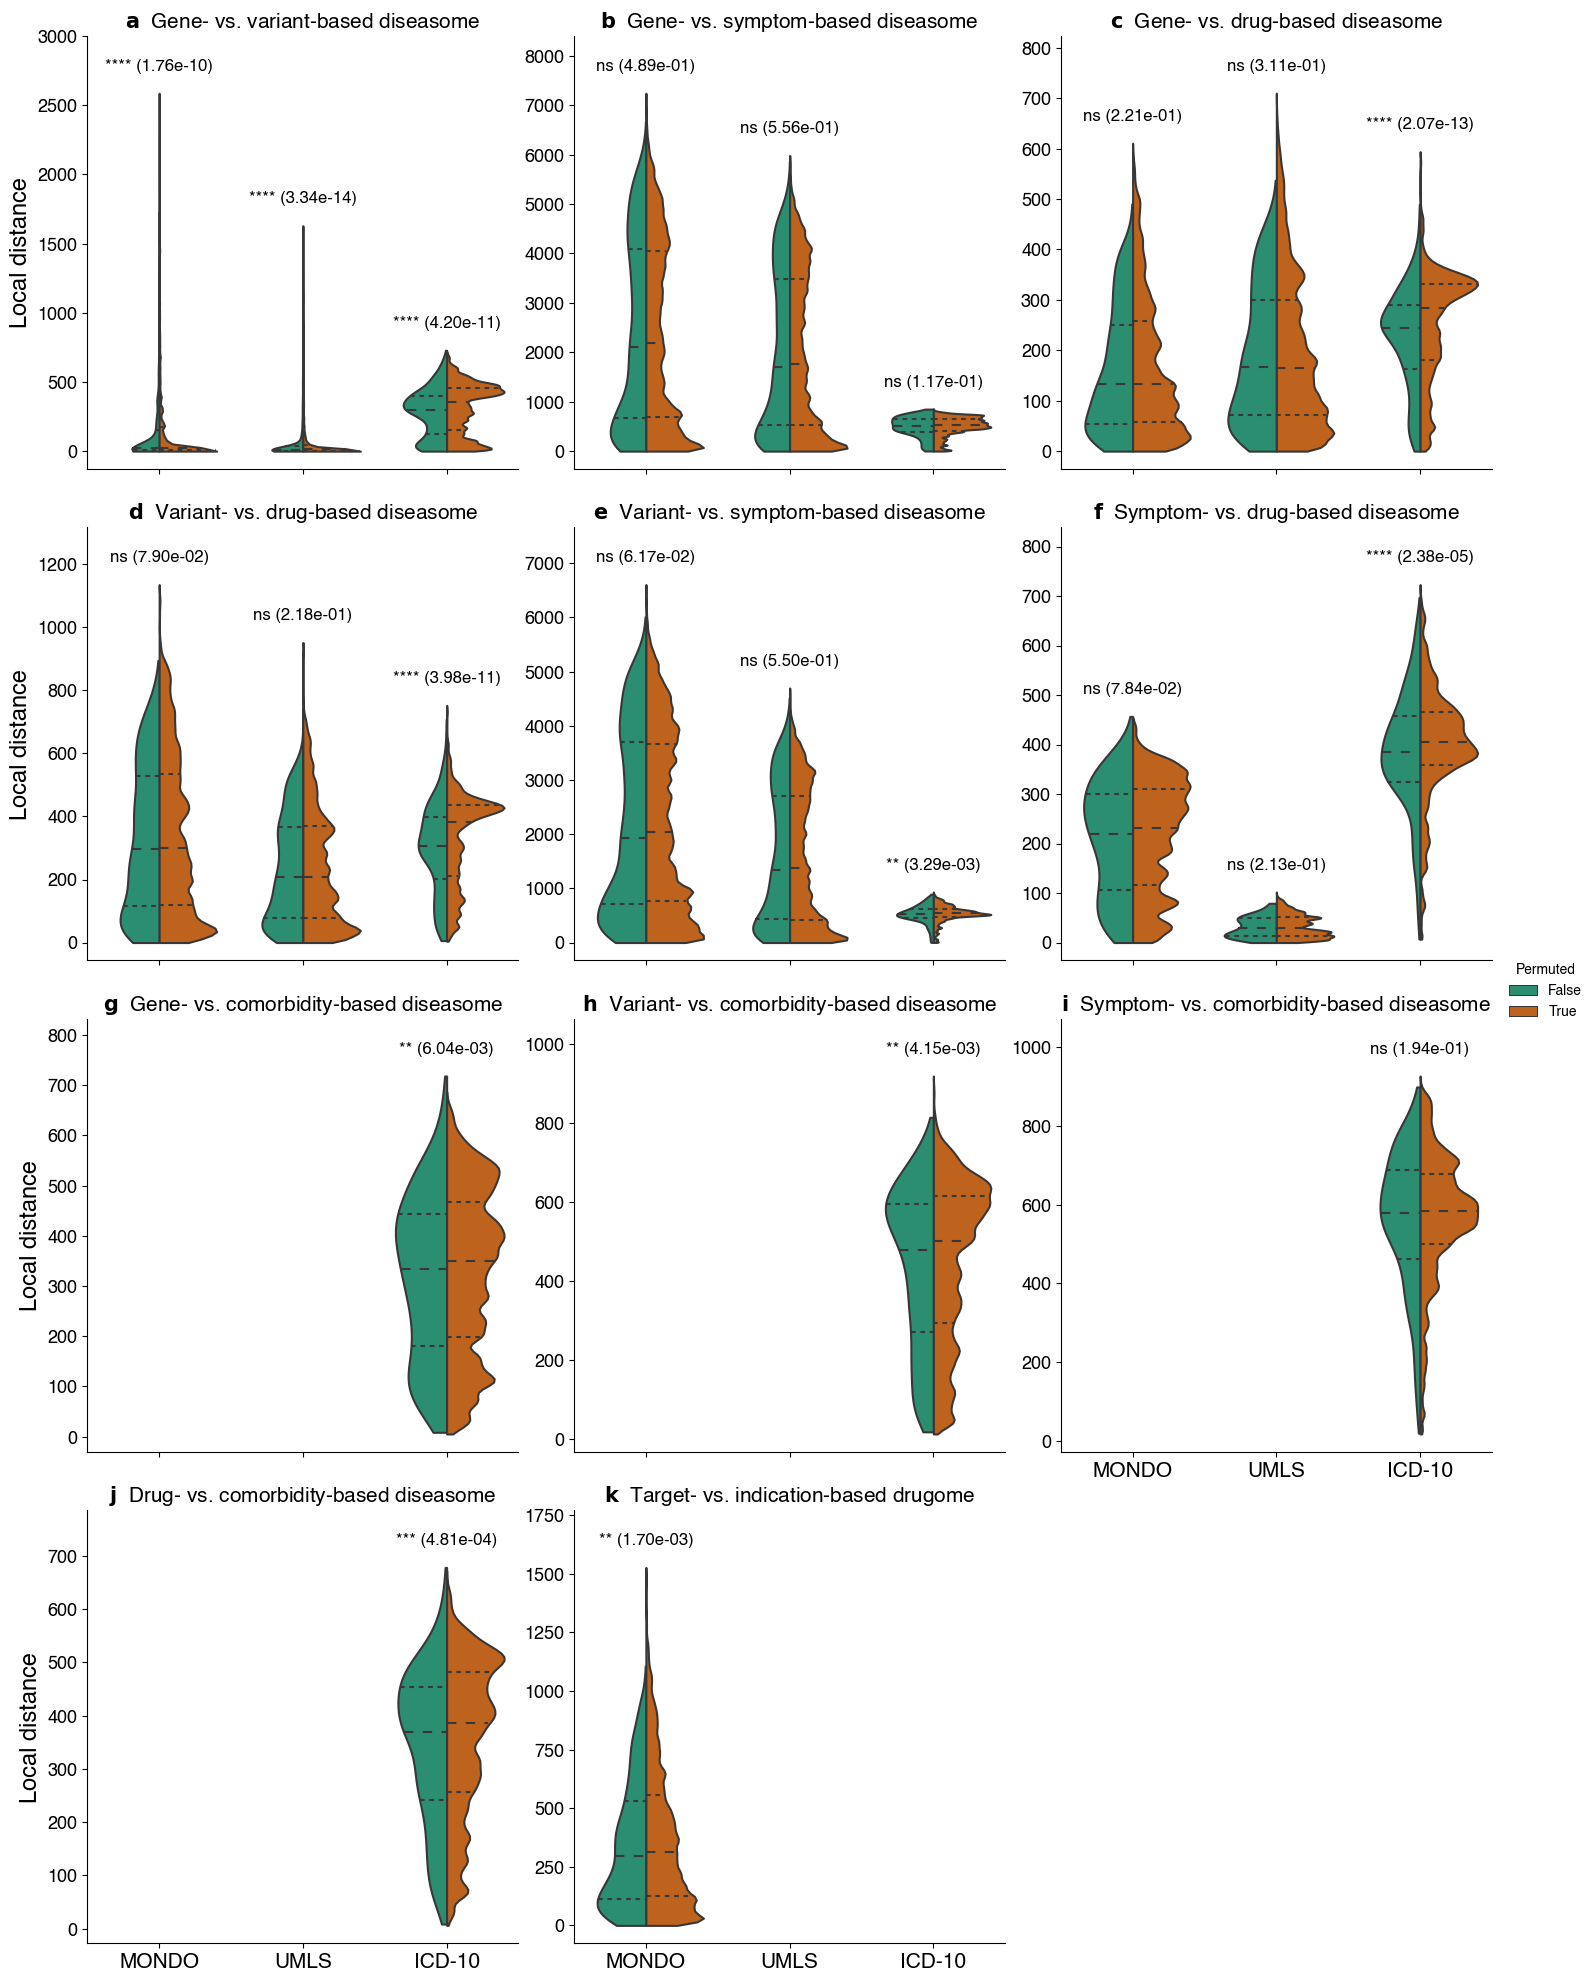

In [81]:
fig = sns.catplot(data=local_distances, sharey=False, palette='Dark2', x='space', col='scenario', hue='Permuted', split=True, kind='violin', y='Local distance', cut=0, inner='quartiles', col_wrap=3)
for axis in fig.axes.flatten():
    axis.tick_params(axis='y', which='major', labelsize=13)
fig.axes.flatten()[0].set_ylabel('Local distance', fontsize=17)
fig.axes.flatten()[3].set_ylabel('Local distance', fontsize=17)
fig.axes.flatten()[6].set_ylabel('Local distance', fontsize=17)
fig.axes.flatten()[9].set_ylabel('Local distance', fontsize=17)
add_p_values(fig, p_value_strings, maxima)
adjust_titles(fig)
adjust_x_ticks(fig)

In [82]:
fig.savefig('local_distances_all_normRanks.png', dpi=600) # Fig. S2
fig.savefig('local_distances_all_normRanks.pdf') # Fig. S2
# fig.savefig('local_distances_all_normScores.png', transparent=True, dpi=600) # Fig. S10
# fig.savefig('local_distances_all_normScores.pdf', transparent=True) # Fig. S10

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


---
## Create plots for global distances - Fig. S1 and S9

In [86]:
global_distances_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_distances.csv')
global_distances_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(global_distances_2.shape[0])]
global_distances_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_distances.csv')
global_distances_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(global_distances_3.shape[0])]
global_distances_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_distances.csv')
global_distances_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(global_distances_4.shape[0])]
global_distances_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_distances.csv')
global_distances_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(global_distances_5.shape[0])]
global_distances_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_distances.csv')
global_distances_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(global_distances_6.shape[0])]
global_distances_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_distances.csv')
global_distances_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(global_distances_7.shape[0])]

global_distances_2u = pd.read_csv('../results/disease_gene_vs_disease_variant_UMLS/global_distances.csv')
global_distances_2u['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(global_distances_2u.shape[0])]
global_distances_3u = pd.read_csv('../results/disease_gene_vs_disease_symptom_UMLS/global_distances.csv')
global_distances_3u['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(global_distances_3u.shape[0])]
global_distances_4u = pd.read_csv('../results/disease_gene_vs_disease_drug_UMLS/global_distances.csv')
global_distances_4u['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(global_distances_4u.shape[0])]
global_distances_5u = pd.read_csv('../results/disease_drug_vs_disease_variant_UMLS/global_distances.csv')
global_distances_5u['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(global_distances_5u.shape[0])]
global_distances_6u = pd.read_csv('../results/disease_symptom_vs_disease_variant_UMLS/global_distances.csv')
global_distances_6u['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(global_distances_6u.shape[0])]
global_distances_7u = pd.read_csv('../results/disease_drug_vs_disease_symptom_UMLS/global_distances.csv')
global_distances_7u['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(global_distances_7u.shape[0])]

global_distances_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_distances.csv')
global_distances_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(global_distances_22.shape[0])]
global_distances_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_distances.csv')
global_distances_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(global_distances_33.shape[0])]
global_distances_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_distances.csv')
global_distances_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(global_distances_44.shape[0])]
global_distances_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_distances.csv')
global_distances_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(global_distances_55.shape[0])]
global_distances_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_distances.csv')
global_distances_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(global_distances_66.shape[0])]
global_distances_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_distances.csv')
global_distances_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(global_distances_77.shape[0])]

global_distances_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(global_distances_1.shape[0])]
global_distances_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(global_distances_10.shape[0])]
global_distances_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(global_distances_11.shape[0])]
global_distances_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(global_distances_12.shape[0])]
global_distances_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_distances.csv')
global_distances_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(global_distances_8.shape[0])]

for gd in [global_distances_2, global_distances_2u, global_distances_22, global_distances_3, global_distances_3u, global_distances_33, 
           global_distances_4, global_distances_4u, global_distances_44, global_distances_5, global_distances_5u, global_distances_55, 
           global_distances_6, global_distances_6u, global_distances_66, global_distances_7, global_distances_7u, global_distances_77, 
           global_distances_1, global_distances_10, global_distances_11, global_distances_12, global_distances_8]:
    indices_remove = gd[gd['distance_type'] == "normalized_scores"].index # comment to plot Fig. S9. uncomment to plot Fig. S1
#     indices_remove = gd[gd['distance_type'] == "normalized_ranks"].index # uncomment to plot Fig. S9. comment to plot Fig. S1
    gd.drop(indices_remove, inplace=True)
    indices_remove = gd[gd['distance_type'] == "topology_only"].index
    gd.drop(indices_remove, inplace=True)

# concatenate both namespaces in one dataframe
gd_concatenated2 = pd.concat([global_distances_2.assign(space='MONDO'), global_distances_2u.assign(space='UMLS'), global_distances_22.assign(space='ICD-10')], ignore_index=True)
gd_concatenated3 = pd.concat([global_distances_3.assign(space='MONDO'), global_distances_3u.assign(space='UMLS'), global_distances_33.assign(space='ICD-10')], ignore_index=True)
gd_concatenated4 = pd.concat([global_distances_4.assign(space='MONDO'), global_distances_4u.assign(space='UMLS'), global_distances_44.assign(space='ICD-10')], ignore_index=True)
gd_concatenated5 = pd.concat([global_distances_5.assign(space='MONDO'), global_distances_5u.assign(space='UMLS'), global_distances_55.assign(space='ICD-10')], ignore_index=True)
gd_concatenated6 = pd.concat([global_distances_6.assign(space='MONDO'), global_distances_6u.assign(space='UMLS'), global_distances_66.assign(space='ICD-10')], ignore_index=True)
gd_concatenated7 = pd.concat([global_distances_7.assign(space='MONDO'), global_distances_7u.assign(space='UMLS'), global_distances_77.assign(space='ICD-10')], ignore_index=True)

gd_concatenated1 = global_distances_1.assign(space='ICD-10')
gd_concatenated10 = global_distances_10.assign(space='ICD-10')
gd_concatenated11 = global_distances_11.assign(space='ICD-10')
gd_concatenated12 = global_distances_12.assign(space='ICD-10')
gd_concatenated8 = global_distances_8.assign(space='MONDO')
global_distances = pd.concat([gd_concatenated2, gd_concatenated3, gd_concatenated4, gd_concatenated5, gd_concatenated6, gd_concatenated7, 
                             gd_concatenated1, gd_concatenated10, gd_concatenated11, gd_concatenated12, gd_concatenated8], ignore_index=True)    

In [87]:
global_distances.rename(columns={'distance': 'Global distance', 'permuted': 'Permuted'}, inplace=True)
dis_type = 'normalized_ranks' # comment to plot Fig. S9. uncomment to plot Fig. S1
# dis_type = 'normalized_scores' # uncomment to plot Fig. S9. comment to plot Fig. S1

In [88]:
delta_name = 'Difference between original and permuted global distance'
global_distances[delta_name] = [0.0 for _ in range(global_distances.shape[0])]
distance_types = [dis_type]
scenarios_both = ['Gene- vs. variant-based diseasome', 'Gene- vs. symptom-based diseasome', 'Gene- vs. drug-based diseasome', 'Variant- vs. drug-based diseasome', 'Variant- vs. symptom-based diseasome', 'Symptom- vs. drug-based diseasome']
scenarios_only_icd = ['Gene- vs. comorbidity-based diseasome', 'Variant- vs. comorbidity-based diseasome', 'Symptom- vs. comorbidity-based diseasome', 'Drug- vs. comorbidity-based diseasome']
scenarios_only_mondo = ['Target- vs. indication-based drugome']

maxima = []
for distance_type in distance_types:
    dt_filter = global_distances['distance_type'] == distance_type
    mondo_filter = global_distances['space'] == 'MONDO'
    umls_filter = global_distances['space'] == 'UMLS'
    icd_filter = global_distances['space'] == 'ICD-10'
    for scenario in scenarios_both:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_mondo = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & mondo_filter].to_numpy()[0]
        true_distance_umls = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & umls_filter].to_numpy()[0]
        true_distance_icd = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & icd_filter].to_numpy()[0]
        differences_mondo = global_distances['Global distance'][dt_filter & sc_filter & mondo_filter].to_numpy() - true_distance_mondo
        differences_umls = global_distances['Global distance'][dt_filter & sc_filter & umls_filter].to_numpy() - true_distance_umls
        differences_icd = global_distances['Global distance'][dt_filter & sc_filter & icd_filter].to_numpy() - true_distance_icd
        global_distances.loc[dt_filter & sc_filter & mondo_filter, delta_name] = differences_mondo
        global_distances.loc[dt_filter & sc_filter & umls_filter, delta_name] = differences_umls
        global_distances.loc[dt_filter & sc_filter & icd_filter, delta_name] = differences_icd
        maxima.append([differences_mondo.max(), differences_umls.max(), differences_icd.max()])
    for scenario in scenarios_only_icd:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_icd = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & icd_filter].to_numpy()[0]
        differences_icd = global_distances['Global distance'][dt_filter & sc_filter & icd_filter].to_numpy() - true_distance_icd
        global_distances.loc[dt_filter & sc_filter & icd_filter, delta_name] = differences_icd
        maxima.append([0.0, 0.0, differences_icd.max()])
    for scenario in scenarios_only_mondo:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_mondo = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & mondo_filter].to_numpy()[0]
        differences_mondo = global_distances['Global distance'][dt_filter & sc_filter & mondo_filter].to_numpy() - true_distance_mondo
        global_distances.loc[dt_filter & sc_filter & mondo_filter, delta_name] = differences_mondo
        maxima.append([differences_mondo.max()])
# print(maxima)

In [90]:
# P-values are from global_empirical_p_values.csv files in the respective results directories.
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_empirical_p_values.csv')
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_empirical_p_values.csv')
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_empirical_p_values.csv')
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_empirical_p_values.csv')
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_empirical_p_values.csv')
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_empirical_p_values.csv')

p_values_2u = pd.read_csv('../results/disease_gene_vs_disease_variant_UMLS/global_empirical_p_values.csv')
p_values_3u = pd.read_csv('../results/disease_gene_vs_disease_symptom_UMLS/global_empirical_p_values.csv')
p_values_4u = pd.read_csv('../results/disease_gene_vs_disease_drug_UMLS/global_empirical_p_values.csv')
p_values_5u = pd.read_csv('../results/disease_drug_vs_disease_variant_UMLS/global_empirical_p_values.csv')
p_values_6u = pd.read_csv('../results/disease_symptom_vs_disease_variant_UMLS/global_empirical_p_values.csv')
p_values_7u = pd.read_csv('../results/disease_drug_vs_disease_symptom_UMLS/global_empirical_p_values.csv')

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_empirical_p_values.csv')
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_empirical_p_values.csv')
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_empirical_p_values.csv')

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_empirical_p_values.csv')

for pvd in [p_values_2, p_values_2u, p_values_22, p_values_3, p_values_3u, p_values_33, p_values_4, p_values_4u,  
            p_values_44, p_values_5, p_values_5u, p_values_55, p_values_6, p_values_6u, p_values_66, p_values_7,  
            p_values_7u, p_values_77, p_values_1, p_values_10, p_values_11, p_values_12, p_values_8]:
    indices_remove = pvd[pvd['distance_type'] == "normalized_scores"].index # comment to plot Fig. S9. uncomment to plot Fig. S1
#     indices_remove = pvd[pvd['distance_type'] == "normalized_ranks"].index # uncomment to plot Fig. S9. comment to plot Fig. S1
    pvd.drop(indices_remove, inplace=True)
    indices_remove = pvd[pvd['distance_type'] == "topology_only"].index
    pvd.drop(indices_remove, inplace=True)
    
pval_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_2u.assign(space='UMLS'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pval_concatenated2.set_index('space', inplace=True)
pval_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_3u.assign(space='UMLS'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pval_concatenated3.set_index('space', inplace=True)
pval_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_4u.assign(space='UMLS'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pval_concatenated4.set_index('space', inplace=True)
pval_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_5u.assign(space='UMLS'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pval_concatenated5.set_index('space', inplace=True)
pval_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_6u.assign(space='UMLS'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pval_concatenated6.set_index('space', inplace=True)
pval_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_7u.assign(space='UMLS'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pval_concatenated7.set_index('space', inplace=True)
pval_concatenated1 = p_values_1.assign(space='ICD-10')
pval_concatenated1.set_index('space', inplace=True)
pval_concatenated10 = p_values_10.assign(space='ICD-10')
pval_concatenated10.set_index('space', inplace=True)
pval_concatenated11 = p_values_11.assign(space='ICD-10')
pval_concatenated11.set_index('space', inplace=True)
pval_concatenated12 = p_values_12.assign(space='ICD-10')
pval_concatenated12.set_index('space', inplace=True)
pval_concatenated8 = p_values_8.assign(space='MONDO')
pval_concatenated8.set_index('space', inplace=True)

p_val_list = [pval_concatenated2, pval_concatenated3, pval_concatenated4, pval_concatenated5, pval_concatenated6, pval_concatenated7]
p_values = [[pv.loc['MONDO', 'p_value'], pv.loc['UMLS', 'p_value'], pv.loc['ICD-10', 'p_value']] for pv in p_val_list]
p_values.append([pval_concatenated1.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated10.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated11.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated12.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated8.loc['MONDO', 'p_value']])

p_value_strings = [[f'{p_value_to_level(p_value)} ({"{:.2e}".format(p_value)})' for p_value in vals] for vals in p_values]
for i in range(6,10):
    p_value_strings[i] = ['', '', p_value_strings[i][0]]
p_value_strings[10] = [p_value_strings[10][0]]
# print(p_value_strings)

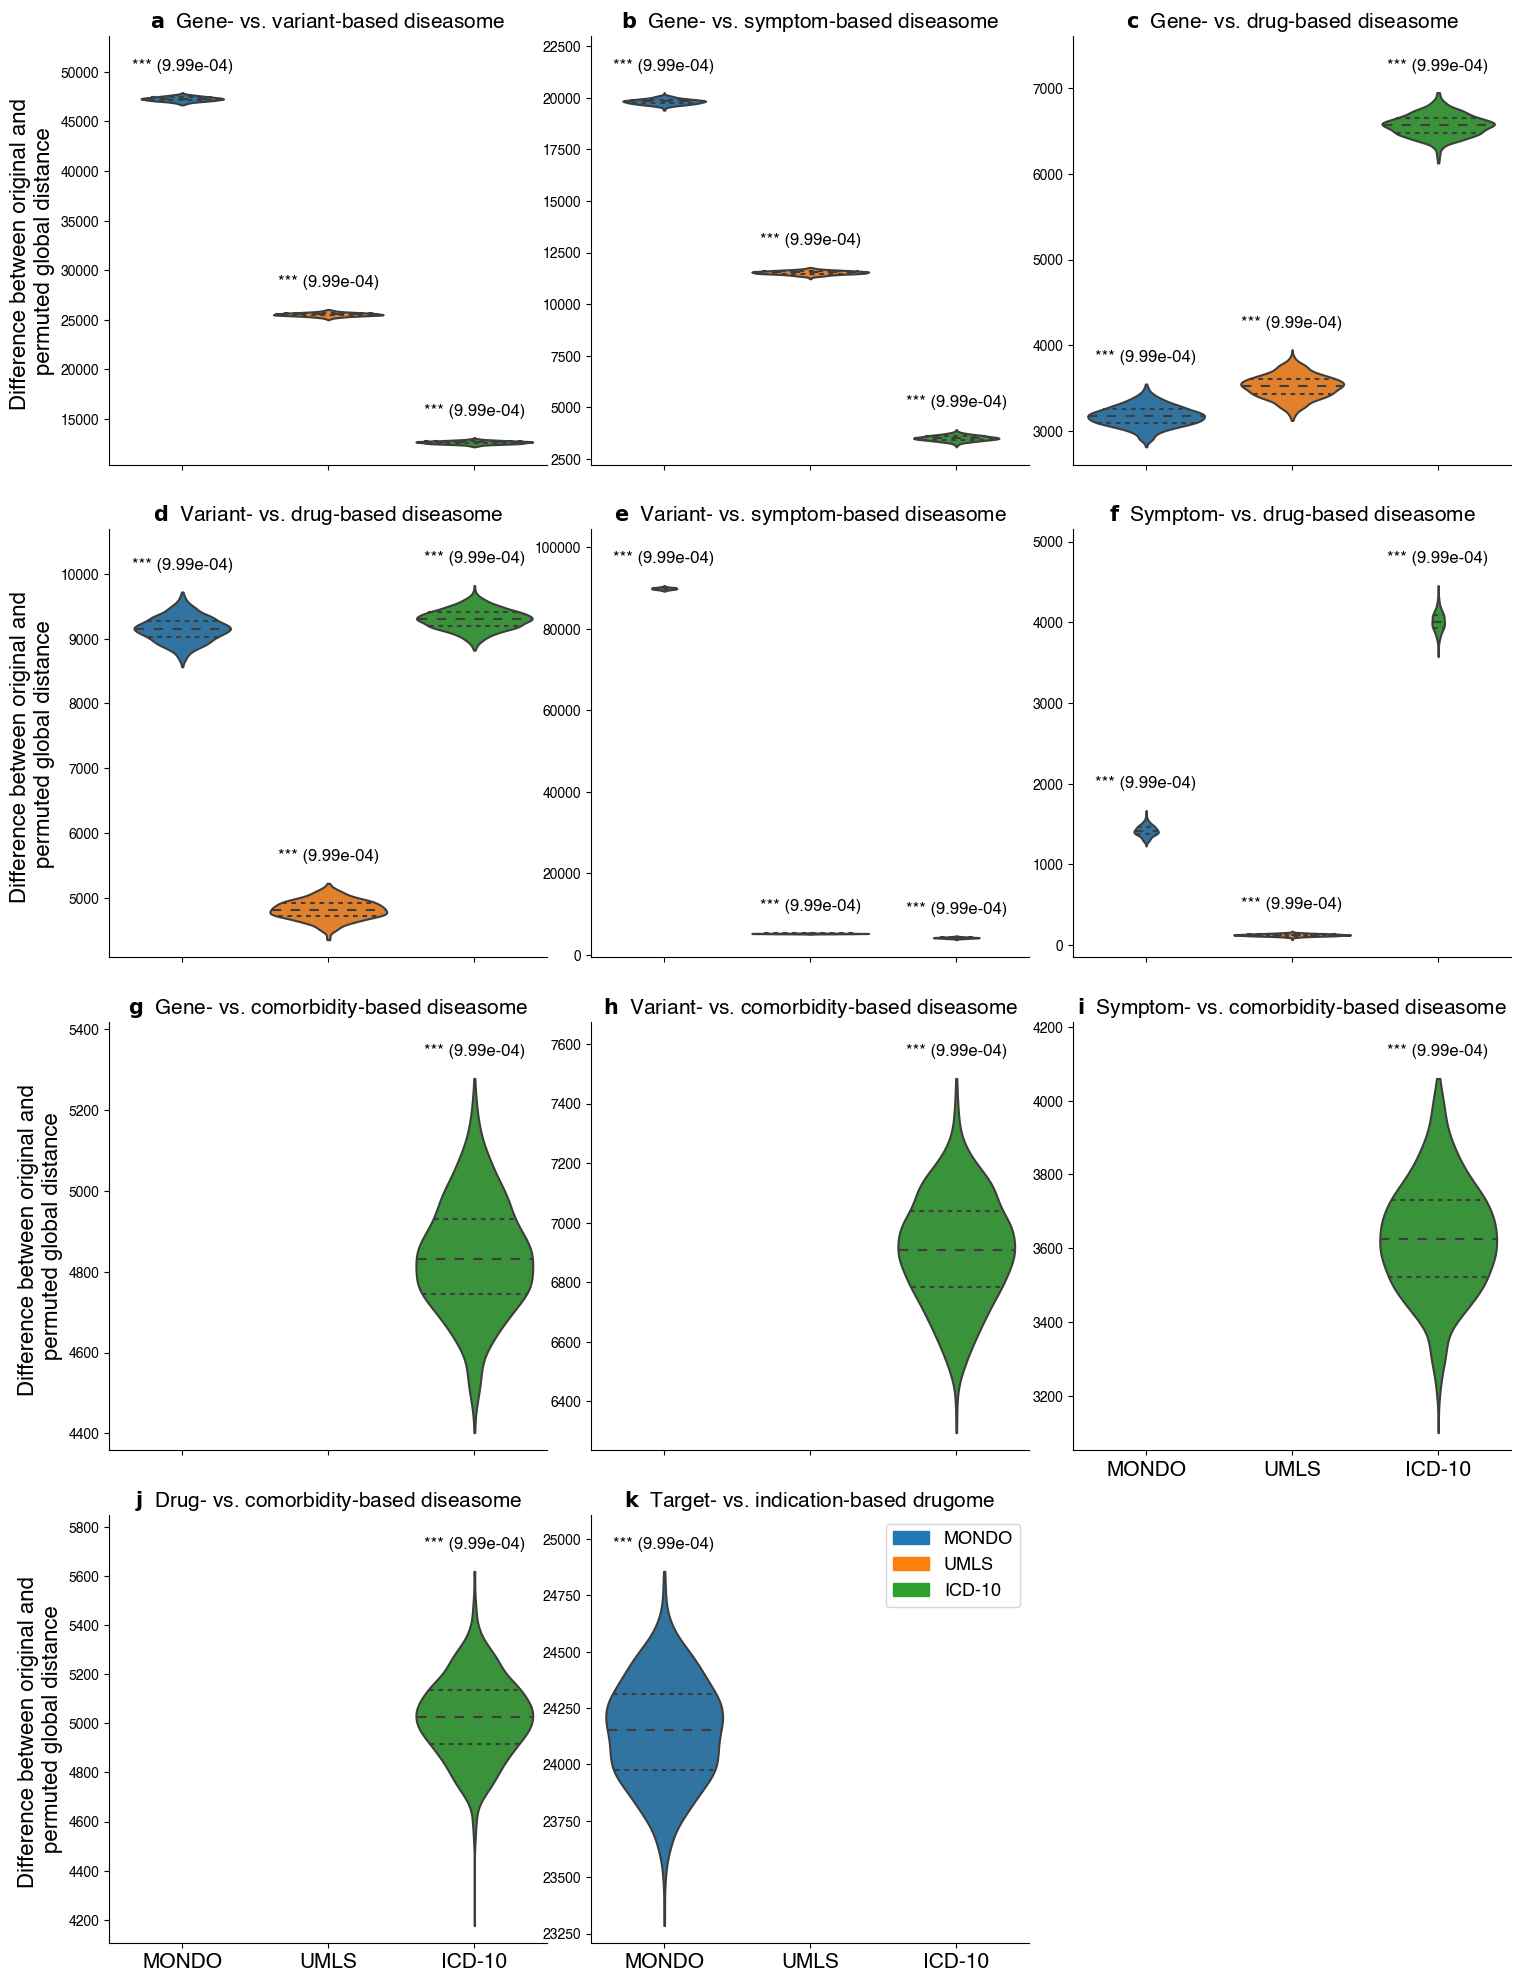

In [91]:
fig = sns.catplot(data=global_distances[global_distances['Permuted']], sharey=False, inner='quartiles', kind='violin', cut=0, palette='tab10', x='space', col='scenario', y=delta_name, col_wrap=3)
plt.subplots_adjust(wspace = 0.1)
plt.subplots_adjust(hspace = 0.15)
adjust_titles(fig)
adjust_x_ticks(fig)
fig.axes.flatten()[0].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[3].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[6].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[9].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
palet_tab10 = sns.color_palette("tab10", 3)
mondo_patch = mpatches.Patch(color=palet_tab10[0], label='MONDO')
umls_patch = mpatches.Patch(color=palet_tab10[1], label='UMLS')
icd10_patch = mpatches.Patch(color=palet_tab10[2], label='ICD-10')
fig.axes.flatten()[10].legend(handles=[mondo_patch, umls_patch, icd10_patch], loc='upper right', fontsize='13')
add_p_values(fig, p_value_strings, maxima)

In [92]:
fig.savefig('difference_global_distances_all_normRanks.png', dpi=600) # Fig. S1
fig.savefig('difference_global_distances_all_normRanks.pdf') # Fig. S1
# fig.savefig('difference_global_distances_all_normScores.png', transparent=True, dpi=600) # Fig. S9
# fig.savefig('difference_global_distances_all_normScores.pdf', transparent=True) # Fig. S9

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


---
## Create plots for local empirical p-values - Fig. S3 and S11

In [93]:
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/local_empirical_p_values.csv')
p_values_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(p_values_2.shape[0])]
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/local_empirical_p_values.csv')
p_values_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(p_values_3.shape[0])]
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/local_empirical_p_values.csv')
p_values_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(p_values_4.shape[0])]
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/local_empirical_p_values.csv')
p_values_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(p_values_5.shape[0])]
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/local_empirical_p_values.csv')
p_values_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(p_values_6.shape[0])]
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/local_empirical_p_values.csv')
p_values_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(p_values_7.shape[0])]

p_values_2u = pd.read_csv('../results/disease_gene_vs_disease_variant_UMLS/local_empirical_p_values.csv')
p_values_2u['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(p_values_2u.shape[0])]
p_values_3u = pd.read_csv('../results/disease_gene_vs_disease_symptom_UMLS/local_empirical_p_values.csv')
p_values_3u['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(p_values_3u.shape[0])]
p_values_4u = pd.read_csv('../results/disease_gene_vs_disease_drug_UMLS/local_empirical_p_values.csv')
p_values_4u['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(p_values_4u.shape[0])]
p_values_5u = pd.read_csv('../results/disease_drug_vs_disease_variant_UMLS/local_empirical_p_values.csv')
p_values_5u['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(p_values_5u.shape[0])]
p_values_6u = pd.read_csv('../results/disease_symptom_vs_disease_variant_UMLS/local_empirical_p_values.csv')
p_values_6u['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(p_values_6u.shape[0])]
p_values_7u = pd.read_csv('../results/disease_drug_vs_disease_symptom_UMLS/local_empirical_p_values.csv')
p_values_7u['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(p_values_7u.shape[0])]

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(p_values_22.shape[0])]
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/local_empirical_p_values.csv')
p_values_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(p_values_33.shape[0])]
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/local_empirical_p_values.csv')
p_values_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(p_values_44.shape[0])]
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(p_values_55.shape[0])]
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(p_values_66.shape[0])]
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/local_empirical_p_values.csv')
p_values_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(p_values_77.shape[0])]

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(p_values_1.shape[0])]
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(p_values_10.shape[0])]
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(p_values_11.shape[0])]
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(p_values_12.shape[0])]
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/local_empirical_p_values.csv')
p_values_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(p_values_8.shape[0])]

for pv in [p_values_2, p_values_2u, p_values_22, p_values_3, p_values_3u, p_values_33, p_values_4, p_values_4u, p_values_44, 
           p_values_5, p_values_5u, p_values_55, p_values_6, p_values_6u, p_values_66, p_values_7, p_values_7u, p_values_77,
           p_values_8, p_values_1, p_values_10, p_values_11, p_values_12]:
    indices_remove = pv[pv['distance_type'] == "normalized_scores"].index # comment to plot Fig. S11. uncomment to plot Fig. S3
#     indices_remove = pv[pv['distance_type'] == "normalized_ranks"].index # uncomment to plot Fig. S11. comment to plot Fig. S3
    pv.drop(indices_remove, inplace=True)
    indices_remove = pv[pv['distance_type'] == "topology_only"].index
    pv.drop(indices_remove, inplace=True)
    
pv_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_2u.assign(space='UMLS'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pv_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_3u.assign(space='UMLS'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pv_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_4u.assign(space='UMLS'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pv_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_5u.assign(space='UMLS'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pv_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_6u.assign(space='UMLS'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pv_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_7u.assign(space='UMLS'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pv_concatenated1 = p_values_1.assign(space='ICD-10')
pv_concatenated10 = p_values_10.assign(space='ICD-10')
pv_concatenated11 = p_values_11.assign(space='ICD-10')
pv_concatenated12 = p_values_12.assign(space='ICD-10')
pv_concatenated8 = p_values_8.assign(space='MONDO')
p_values = pd.concat([pv_concatenated2, pv_concatenated3, pv_concatenated4, pv_concatenated5, pv_concatenated6, pv_concatenated7, 
                      pv_concatenated1, pv_concatenated10, pv_concatenated11, pv_concatenated12, pv_concatenated8], ignore_index=True)
p_values.rename(columns={'p_value': 'Local empirical p-value', 'distance_type': 'Distance type'}, inplace=True)
p_values.rename(columns={'space': 'Vocabulary'}, inplace=True)

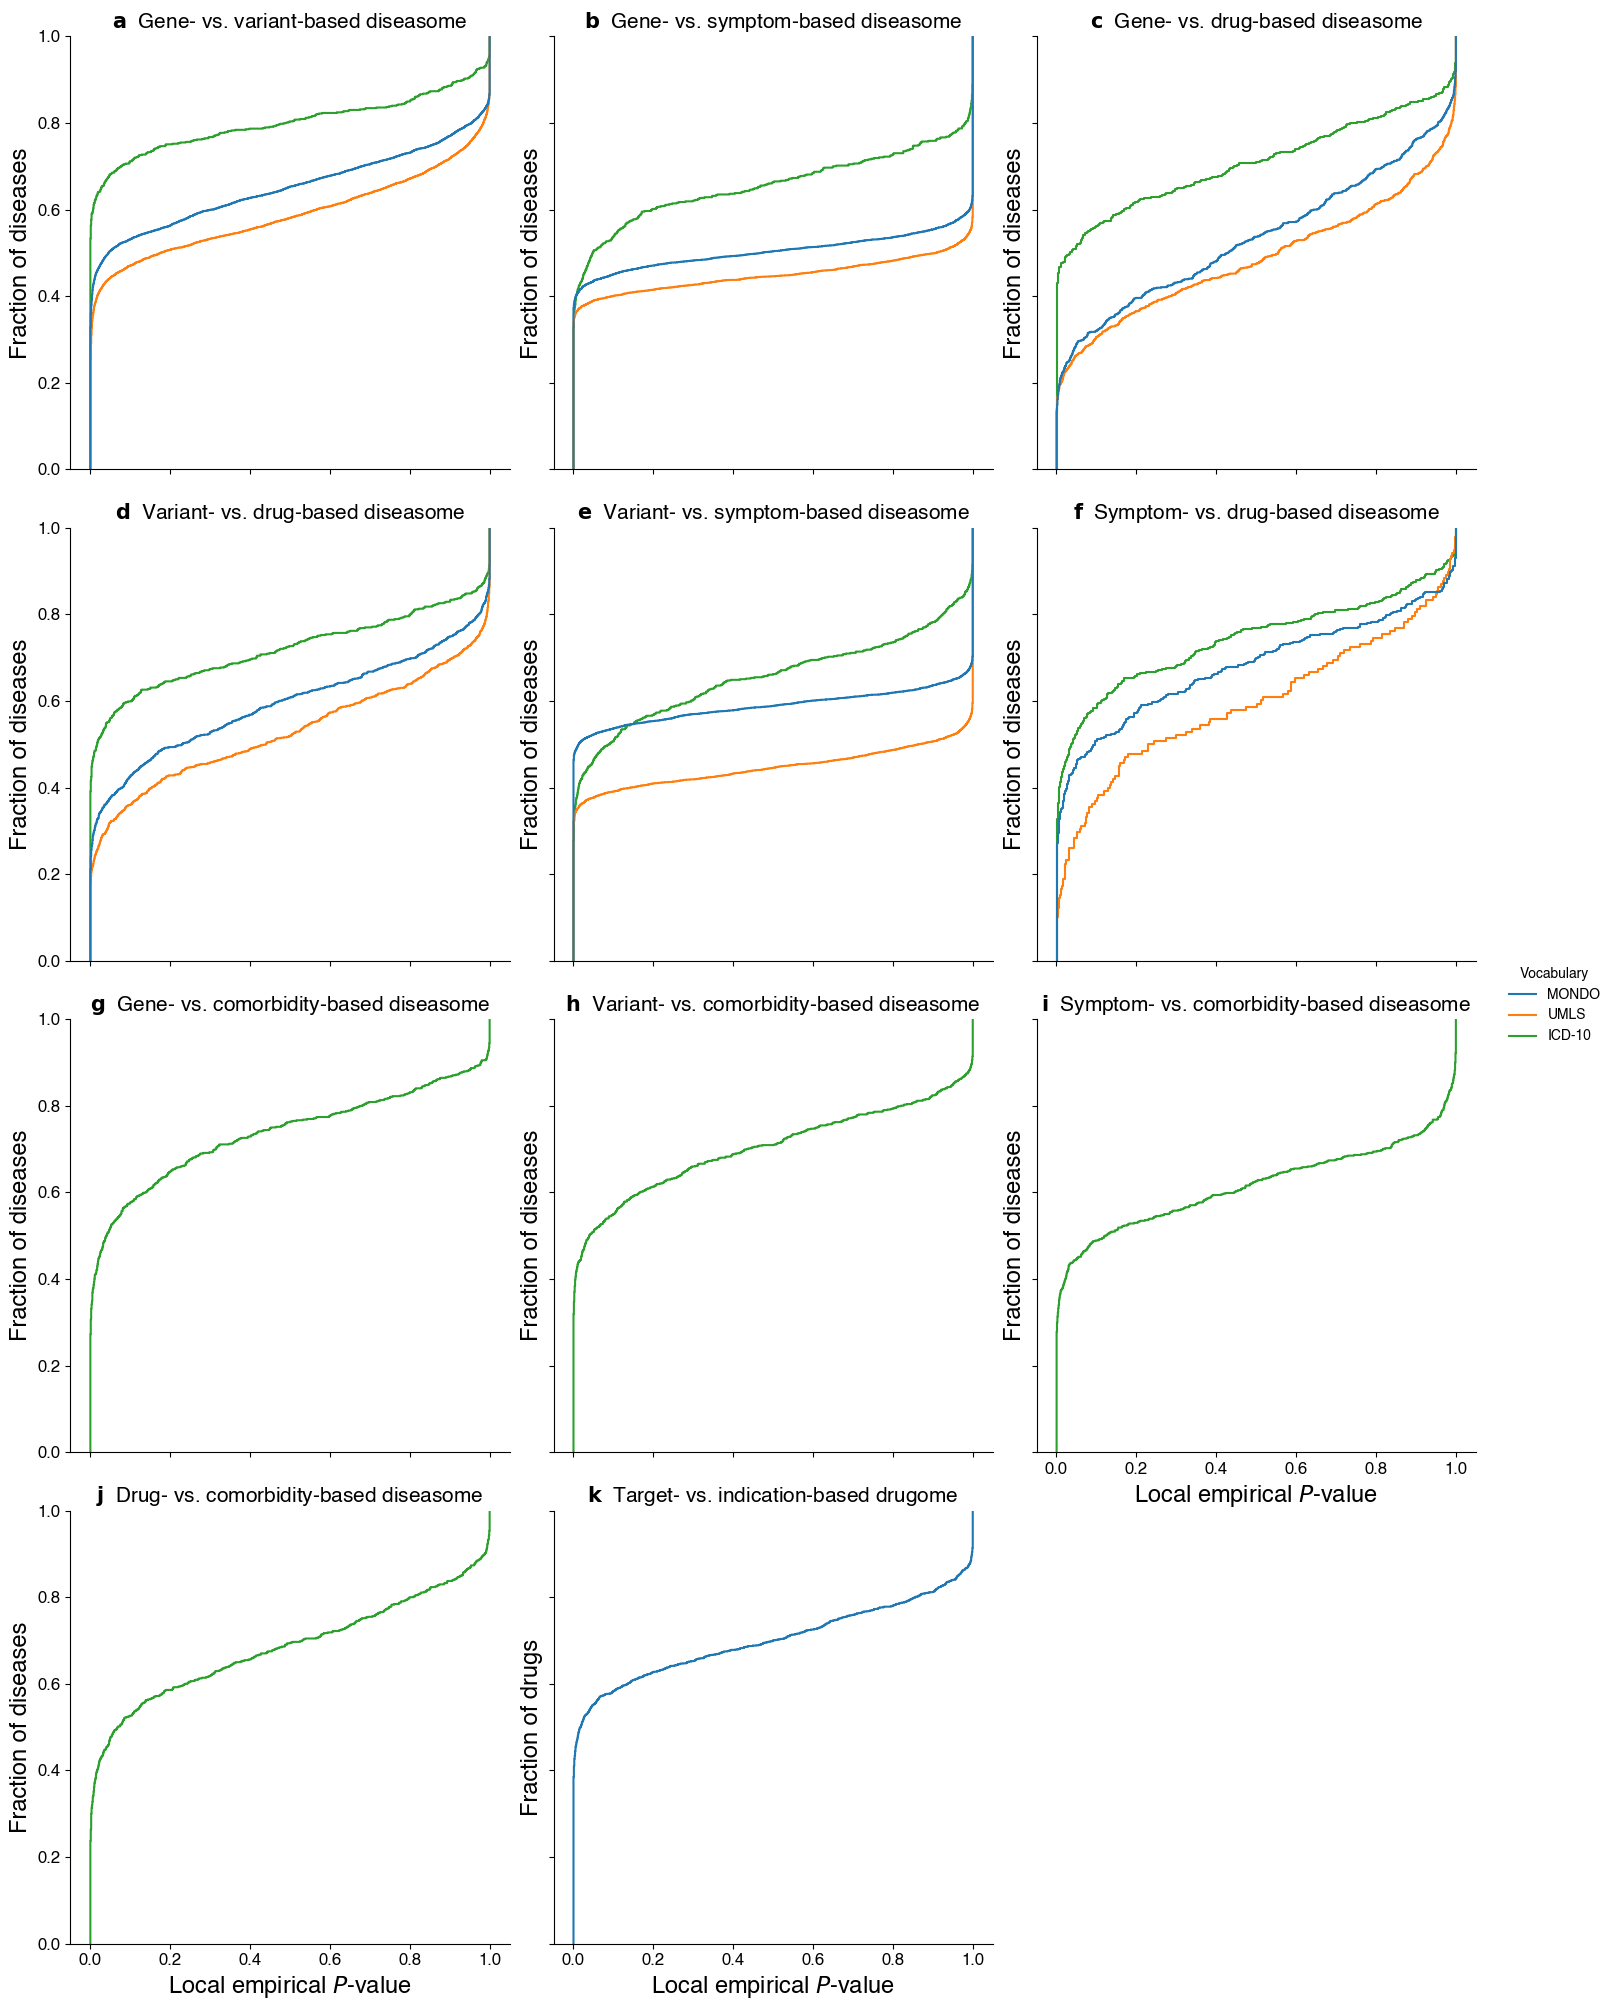

In [94]:
fig = sns.displot(data=p_values, kind='ecdf', palette='tab10',hue_order=['MONDO', 'UMLS', 'ICD-10'], hue='Vocabulary', col='scenario', x='Local empirical p-value', col_wrap=3)
fig.set_xlabels('Local empirical ' + r'$P$' + '-value', fontsize = 17)
plt.subplots_adjust(wspace = 0.1)
for counter, axis in enumerate(fig.axes.flat):
    axis.tick_params(axis='both', which='major', labelsize=12)
    axis.set_ylabel('Fraction of diseases', fontsize=17)
    if counter < 10:
        axis.set_ylabel('Fraction of diseases', fontsize=17, visible=True)
    elif counter == 10:
        axis.set_ylabel('Fraction of drugs', fontsize=17, visible=True)
adjust_titles(fig)

In [95]:
fig.savefig('local_empirical_p_values_all_normRanks.png', dpi=600) # Fig. S3
fig.savefig('local_empirical_p_values_all_normRanks.pdf') # Fig. S3
# fig.savefig('local_empirical_p_values_all_normScores.png', transparent=True, dpi=600) # Fig. S11
# fig.savefig('local_empirical_p_values_all_normScores.pdf', transparent=True) # Fig. S11

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
